# Loading Betting Data

In [1]:
import os
import glob
import pandas as pd

# So printing dataframes doesn't explode the screen
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

# If you're running this notebook from the project root:
BET_DATA_PATH = os.path.join("bet_data", "*.xls*")  # catches .xls and .xlsx


In [2]:
files = sorted(glob.glob(BET_DATA_PATH))

print(f"Found {len(files)} tennis-data files:")
for f in files:
    print(os.path.basename(f))



Found 16 tennis-data files:
2010.xls
2011.xls
2012.xls
2013.xlsx
2014.xlsx
2015.xlsx
2016.xlsx
2017.xlsx
2018.xlsx
2019.xlsx
2020.xlsx
2021.xlsx
2022.xlsx
2023.xlsx
2024.xlsx
2025.xlsx


In [5]:
bet_dfs = []

for file in files:
    year = os.path.splitext(os.path.basename(file))[0]  # "2013" from "2013.xlsx"
    print(f"Loading {file} (year = {year})")
    
    # tennis-data.co.uk files are Excel, so use read_excel
    df = pd.read_excel(file)
    
    # Track source year/file just in case
    df["source_file"] = os.path.basename(file)
    df["source_year"] = int(year)
    
    bet_dfs.append(df)

bet_df_raw = pd.concat(bet_dfs, ignore_index=True)
print("Combined shape:", bet_df_raw.shape)
bet_df_raw.head()


Loading bet_data/2010.xls (year = 2010)
Loading bet_data/2011.xls (year = 2011)
Loading bet_data/2012.xls (year = 2012)
Loading bet_data/2013.xlsx (year = 2013)


/Users/lukefeng/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Loading bet_data/2014.xlsx (year = 2014)


/Users/lukefeng/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Loading bet_data/2015.xlsx (year = 2015)


/Users/lukefeng/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Loading bet_data/2016.xlsx (year = 2016)


/Users/lukefeng/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Loading bet_data/2017.xlsx (year = 2017)
Loading bet_data/2018.xlsx (year = 2018)
Loading bet_data/2019.xlsx (year = 2019)
Loading bet_data/2020.xlsx (year = 2020)
Loading bet_data/2021.xlsx (year = 2021)
Loading bet_data/2022.xlsx (year = 2022)
Loading bet_data/2023.xlsx (year = 2023)
Loading bet_data/2024.xlsx (year = 2024)
Loading bet_data/2025.xlsx (year = 2025)
Combined shape: (40751, 46)


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,EXW,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,source_file,source_year,BFEW,BFEL
0,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Gasquet R.,Nieminen J.,52.0,88.0,850.0,568.0,6.0,3.0,4.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.44,2.62,1.48,2.53,1.533,2.375,1.526,2.740,1.500,2.500,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN
1,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Odesnik W.,Clement A.,105.0,63.0,521.0,667.0,6.0,4.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,2.25,1.57,2.2,1.65,2.250,1.571,2.140,1.813,2.250,1.571,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN
2,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Gicquel M.,Petzschner P.,58.0,80.0,744.0,587.0,6.0,3.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.61,2.20,1.65,2.20,1.667,2.100,1.676,2.360,1.615,2.200,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN
3,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Falla A.,Chardy J.,81.0,32.0,587.0,1102.0,6.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,2.62,1.44,2.58,1.46,2.500,1.500,2.580,1.581,2.500,1.500,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN
4,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Levy H.,Llodra M.,119.0,67.0,461.0,649.0,6.0,2.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,3.00,1.36,2.6,1.46,2.625,1.444,2.170,1.787,3.000,1.333,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN


In [6]:
bet_df = bet_df_raw.copy()
bet_df.columns = bet_df.columns.str.strip().str.lower()
bet_df.columns


Index(['atp', 'location', 'tournament', 'date', 'series', 'court', 'surface', 'round', 'best of', 'winner', 'loser', 'wrank', 'lrank', 'wpts', 'lpts', 'w1', 'l1', 'w2', 'l2', 'w3', 'l3', 'w4', 'l4',
       'w5', 'l5', 'wsets', 'lsets', 'comment', 'b365w', 'b365l', 'exw', 'exl', 'lbw', 'lbl', 'psw', 'psl', 'sjw', 'sjl', 'maxw', 'maxl', 'avgw', 'avgl', 'source_file', 'source_year', 'bfew',
       'bfel'],
      dtype='object')

In [7]:
bet_df["date"] = pd.to_datetime(bet_df["date"], errors="coerce")

# Quick sanity check
bet_df["date"].describe()


/var/folders/dl/jpgfff953bxdj31w4j1pqc_c0000gn/T/ipykernel_22067/2194582290.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bet_df["date"].describe()


count                   40751
unique                   4429
top       2010-01-19 00:00:00
freq                       53
first     2010-01-04 00:00:00
last      2025-11-08 00:00:00
Name: date, dtype: object

In [8]:
# Keep only rows explicitly marked 'Completed' if that column exists
if "comment" in bet_df.columns:
    bet_df = bet_df[bet_df["comment"] == "Completed"]

# Also drop obvious walkovers in the score
if "score" in bet_df.columns:
    bet_df = bet_df[~bet_df["score"].astype(str).str.contains("W/O", case=False, na=False)]

print("After filtering completed matches:", bet_df.shape)


After filtering completed matches: (39233, 46)


In [9]:
for col in ["winner", "loser"]:
    if col in bet_df.columns:
        bet_df[col] = (
            bet_df[col]
            .astype(str)
            .str.strip()
            .str.lower()
        )

bet_df[["winner", "loser"]].head()


,winner,loser
0,gasquet r.,nieminen j.
1,odesnik w.,clement a.
2,gicquel m.,petzschner p.
3,falla a.,chardy j.
4,levy h.,llodra m.


In [10]:
import numpy as np

# Implied probabilities from Bet365 odds (if present)
if {"b365w", "b365l"}.issubset(bet_df.columns):
    bet_df["b365w_prob"] = 1.0 / bet_df["b365w"]
    bet_df["b365l_prob"] = 1.0 / bet_df["b365l"]
    
    # Normalize so they sum roughly to 1 (remove overround)
    total_prob = bet_df["b365w_prob"] + bet_df["b365l_prob"]
    bet_df["b365w_prob_norm"] = bet_df["b365w_prob"] / total_prob
    bet_df["b365l_prob_norm"] = bet_df["b365l_prob"] / total_prob

# Rank difference (loser rank minus winner rank, so positive means winner was higher-ranked)
if {"wrank", "lrank"}.issubset(bet_df.columns):
    bet_df["rank_diff"] = bet_df["lrank"] - bet_df["wrank"]

bet_df[["winner", "loser", "wrank", "lrank", "rank_diff"]].head()


,winner,loser,wrank,lrank,rank_diff
0,gasquet r.,nieminen j.,52.0,88.0,36.0
1,odesnik w.,clement a.,105.0,63.0,-42.0
2,gicquel m.,petzschner p.,58.0,80.0,22.0
3,falla a.,chardy j.,81.0,32.0,-49.0
4,levy h.,llodra m.,119.0,67.0,-52.0


In [11]:
print("Number of matches:", len(bet_df))
print("Unique winners:", bet_df["winner"].nunique())
print("Unique losers:", bet_df["loser"].nunique())

bet_df["surface"].value_counts()


Number of matches: 39233
Unique winners: 728
Unique losers: 1090


Hard     22522
Clay     12197
Grass     4514
Name: surface, dtype: int64

<Axes: >

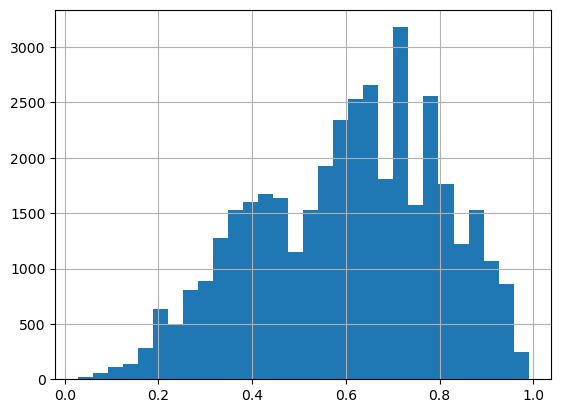

In [12]:
bet_df["b365w_prob_norm"].hist(bins=30)


In [13]:
OUTPUT_DIR = "processed"
os.makedirs(OUTPUT_DIR, exist_ok=True)

bet_df.to_csv(os.path.join(OUTPUT_DIR, "bet_data_2010_2024_clean.csv"), index=False)
print("Saved cleaned betting data to processed/bet_data_2010_2024_clean.csv")


Saved cleaned betting data to processed/bet_data_2010_2024_clean.csv


# Loading ATP Data (Sackmann)

In [14]:
import os
import glob
import pandas as pd

# Path to your Sackmann data
ATP_PATH = os.path.join("atp_match_data", "atp_matches_*.csv")

atp_files = sorted(glob.glob(ATP_PATH))

print(f"Found {len(atp_files)} Sackmann files:")
for f in atp_files:
    print(os.path.basename(f))


Found 25 Sackmann files:
atp_matches_2000.csv
atp_matches_2001.csv
atp_matches_2002.csv
atp_matches_2003.csv
atp_matches_2004.csv
atp_matches_2005.csv
atp_matches_2006.csv
atp_matches_2007.csv
atp_matches_2008.csv
atp_matches_2009.csv
atp_matches_2010.csv
atp_matches_2011.csv
atp_matches_2012.csv
atp_matches_2013.csv
atp_matches_2014.csv
atp_matches_2015.csv
atp_matches_2016.csv
atp_matches_2017.csv
atp_matches_2018.csv
atp_matches_2019.csv
atp_matches_2020.csv
atp_matches_2021.csv
atp_matches_2022.csv
atp_matches_2023.csv
atp_matches_2024.csv


In [15]:
atp_dfs = []

for file in atp_files:
    year = int(os.path.basename(file).split("_")[-1].split(".")[0])  # 2013 from atp_matches_2013.csv
    print(f"Loading {file} (year = {year})")
    
    df = pd.read_csv(file)
    df["source_year"] = year
    df["source_file"] = os.path.basename(file)
    
    atp_dfs.append(df)

atp_raw = pd.concat(atp_dfs, ignore_index=True)
print("Combined Sackmann shape:", atp_raw.shape)
atp_raw.head()


Loading atp_match_data/atp_matches_2000.csv (year = 2000)
Loading atp_match_data/atp_matches_2001.csv (year = 2001)
Loading atp_match_data/atp_matches_2002.csv (year = 2002)
Loading atp_match_data/atp_matches_2003.csv (year = 2003)
Loading atp_match_data/atp_matches_2004.csv (year = 2004)
Loading atp_match_data/atp_matches_2005.csv (year = 2005)
Loading atp_match_data/atp_matches_2006.csv (year = 2006)
Loading atp_match_data/atp_matches_2007.csv (year = 2007)
Loading atp_match_data/atp_matches_2008.csv (year = 2008)
Loading atp_match_data/atp_matches_2009.csv (year = 2009)
Loading atp_match_data/atp_matches_2010.csv (year = 2010)
Loading atp_match_data/atp_matches_2011.csv (year = 2011)
Loading atp_match_data/atp_matches_2012.csv (year = 2012)
Loading atp_match_data/atp_matches_2013.csv (year = 2013)
Loading atp_match_data/atp_matches_2014.csv (year = 2014)
Loading atp_match_data/atp_matches_2015.csv (year = 2015)
Loading atp_match_data/atp_matches_2016.csv (year = 2016)
Loading atp_ma

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,source_year,source_file
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.7,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0,2000,atp_matches_2000.csv
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.5,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.3,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0,2000,atp_matches_2000.csv
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.3,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.5,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0,2000,atp_matches_2000.csv
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.9,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0,2000,atp_matches_2000.csv
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.3,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.7,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0,2000,atp_matches_2000.csv


In [16]:
atp_dfs = []

for file in atp_files:
    year = int(os.path.basename(file).split("_")[-1].split(".")[0])  # 2013 from atp_matches_2013.csv
    print(f"Loading {file} (year = {year})")
    
    df = pd.read_csv(file)
    df["source_year"] = year
    df["source_file"] = os.path.basename(file)
    
    atp_dfs.append(df)

atp_raw = pd.concat(atp_dfs, ignore_index=True)
print("Combined Sackmann shape:", atp_raw.shape)
atp_raw.head()


Loading atp_match_data/atp_matches_2000.csv (year = 2000)
Loading atp_match_data/atp_matches_2001.csv (year = 2001)
Loading atp_match_data/atp_matches_2002.csv (year = 2002)
Loading atp_match_data/atp_matches_2003.csv (year = 2003)
Loading atp_match_data/atp_matches_2004.csv (year = 2004)
Loading atp_match_data/atp_matches_2005.csv (year = 2005)
Loading atp_match_data/atp_matches_2006.csv (year = 2006)
Loading atp_match_data/atp_matches_2007.csv (year = 2007)
Loading atp_match_data/atp_matches_2008.csv (year = 2008)
Loading atp_match_data/atp_matches_2009.csv (year = 2009)
Loading atp_match_data/atp_matches_2010.csv (year = 2010)
Loading atp_match_data/atp_matches_2011.csv (year = 2011)
Loading atp_match_data/atp_matches_2012.csv (year = 2012)
Loading atp_match_data/atp_matches_2013.csv (year = 2013)
Loading atp_match_data/atp_matches_2014.csv (year = 2014)
Loading atp_match_data/atp_matches_2015.csv (year = 2015)
Loading atp_match_data/atp_matches_2016.csv (year = 2016)
Loading atp_ma

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,source_year,source_file
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.7,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0,2000,atp_matches_2000.csv
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.5,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.3,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0,2000,atp_matches_2000.csv
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.3,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.5,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0,2000,atp_matches_2000.csv
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.9,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0,2000,atp_matches_2000.csv
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.3,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.7,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0,2000,atp_matches_2000.csv


In [18]:
atp = atp_raw.copy()

# Normalize column names
atp.columns = atp.columns.str.strip().str.lower()
atp.columns[:20]  # quick peek


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht',
       'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand'],
      dtype='object')

In [19]:
atp["tourney_date"] = pd.to_datetime(atp["tourney_date"].astype(str), format="%Y%m%d", errors="coerce")
atp["tourney_date"].describe()


/var/folders/dl/jpgfff953bxdj31w4j1pqc_c0000gn/T/ipykernel_22067/1182315783.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  atp["tourney_date"].describe()


count                   74906
unique                   1137
top       2009-03-06 00:00:00
freq                      136
first     2000-01-03 00:00:00
last      2024-12-18 00:00:00
Name: tourney_date, dtype: object

In [20]:
for col in ["winner_name", "loser_name"]:
    if col in atp.columns:
        atp[col] = (
            atp[col]
            .astype(str)
            .str.strip()
            .str.lower()
        )

atp[["winner_name", "loser_name"]].head()


,winner_name,loser_name
0,tommy haas,jeff tarango
1,juan balcells,franco squillari
2,alberto martin,alberto berasategui
3,juan carlos ferrero,roger federer
4,michael sell,nicolas escude


In [21]:
# Drop walkovers and unfinished matches based on score string
if "score" in atp.columns:
    mask_w_o = atp["score"].astype(str).str.contains("w/o", case=False, na=False)
    mask_ret = atp["score"].astype(str).str.contains("ret", case=False, na=False)
    mask_def = atp["score"].astype(str).str.contains("def", case=False, na=False) & ~atp["score"].str.contains("-", na=False)
    
    # Keep only matches that look like they have a normal score
    atp = atp[~(mask_w_o | mask_ret | mask_def)]

print("After removing walkovers/retirements:", atp.shape)


After removing walkovers/retirements: (72299, 51)


In [22]:
atp = atp[(atp["source_year"] >= 2000) & (atp["source_year"] <= 2024)]
atp["source_year"].value_counts().sort_index()


2000    3280
2001    3224
2002    3098
2003    3088
2004    3188
2005    3167
2006    3148
2007    3087
2008    2993
2009    2954
2010    2909
2011    2891
2012    2900
2013    2823
2014    2775
2015    2833
2016    2827
2017    2799
2018    2813
2019    2726
2020    1431
2021    2651
2022    2829
2023    2890
2024    2975
Name: source_year, dtype: int64

In [23]:
print("Rows:", len(atp))
print("Unique winners:", atp["winner_name"].nunique())
print("Unique losers:", atp["loser_name"].nunique())
atp["surface"].value_counts()
atp["tourney_level"].value_counts()  # G = slam, M = Masters, A = ATP, C = Challenger, F = Futures


Rows: 72299
Unique winners: 1743
Unique losers: 2535


A    39448
M    13527
G    12049
D     6780
F      432
O       63
Name: tourney_level, dtype: int64

In [24]:
os.makedirs("processed", exist_ok=True)

atp.to_csv("processed/atp_matches_2000_2024_clean.csv", index=False)
print("Saved cleaned Sackmann data to processed/atp_matches_2000_2024_clean.csv")


Saved cleaned Sackmann data to processed/atp_matches_2000_2024_clean.csv


# Computing ELO System
Jeff Sackmann Elo Formula 
- K-factor dpeending on best of 3 vs best of 5
- Surface specific adjustment
- Aging decay factor
- Margin of victory ignored
- Draws never occur

In [25]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Copy the cleaned sackmann dataframe
elo_df = atp.copy()

# Sort all matches by date to process in correct chronological order
elo_df = elo_df.sort_values("tourney_date").reset_index(drop=True)

# Constants for Sackmann-style tennis Elo
BASE_ELO = 1500
K_BO3 = 32      # best-of-3 matches
K_BO5 = 48      # best-of-5 matches (higher because more reliable result)
DECAY = 0.999   # small rating decay per match to avoid rating inflation

# Initialize dictionaries
global_elo = defaultdict(lambda: BASE_ELO)
hard_elo   = defaultdict(lambda: BASE_ELO)
clay_elo   = defaultdict(lambda: BASE_ELO)
grass_elo  = defaultdict(lambda: BASE_ELO)

# To store outputs
pre_ELO_global_w = []
pre_ELO_global_l = []
pre_ELO_surface_w = []
pre_ELO_surface_l = []

# Map surface to the correct elo dict
surface_map = {
    "hard":  hard_elo,
    "clay":  clay_elo,
    "grass": grass_elo
}

def expected_score(elo_a, elo_b):
    """Expected probability that A beats B."""
    return 1 / (1 + 10 ** ((elo_b - elo_a) / 400))


for idx, row in elo_df.iterrows():
    w = row["winner_name"]
    l = row["loser_name"]
    surface = str(row["surface"]).lower()
    
    # If surface not recognized, default to global update only
    if surface not in surface_map:
        surface = None
    
    # Pre-match global Elo
    elo_w_global = global_elo[w]
    elo_l_global = global_elo[l]
    
    # Pre-match surface Elo
    if surface:
        elo_w_surface = surface_map[surface][w]
        elo_l_surface = surface_map[surface][l]
    else:
        elo_w_surface = np.nan
        elo_l_surface = np.nan
    
    # Store pre-match values
    pre_ELO_global_w.append(elo_w_global)
    pre_ELO_global_l.append(elo_l_global)
    pre_ELO_surface_w.append(elo_w_surface)
    pre_ELO_surface_l.append(elo_l_surface)
    
    # Determine K-factor
    k = K_BO5 if row["best_of"] == 5 else K_BO3
    
    # Expected scores (global)
    exp_w = expected_score(elo_w_global, elo_l_global)
    exp_l = 1 - exp_w
    
    # Update global Elo
    global_elo[w] = (elo_w_global * DECAY) + k * (1 - exp_w)
    global_elo[l] = (elo_l_global * DECAY) + k * (0 - exp_l)
    
    # Update surface-specific Elo
    if surface:
        exp_w_s = expected_score(elo_w_surface, elo_l_surface)
        exp_l_s = 1 - exp_w_s
        
        surface_map[surface][w] = (elo_w_surface * DECAY) + k * (1 - exp_w_s)
        surface_map[surface][l] = (elo_l_surface * DECAY) + k * (0 - exp_l_s)

# Attach results to dataframe
elo_df["elo_global_w_before"] = pre_ELO_global_w
elo_df["elo_global_l_before"] = pre_ELO_global_l
elo_df["elo_surface_w_before"] = pre_ELO_surface_w
elo_df["elo_surface_l_before"] = pre_ELO_surface_l

# Elo differences (winner minus loser)
elo_df["elo_global_diff"]  = elo_df["elo_global_w_before"]  - elo_df["elo_global_l_before"]
elo_df["elo_surface_diff"] = elo_df["elo_surface_w_before"] - elo_df["elo_surface_l_before"]

print("ELO calculation complete!")
elo_df.head()


ELO calculation complete!


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stin,w_1stwon,w_2ndwon,w_svgms,w_bpsaved,w_bpfaced,l_ace,l_df,l_svpt,l_1stin,l_1stwon,l_2ndwon,l_svgms,l_bpsaved,l_bpfaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,source_year,source_file,elo_global_w_before,elo_global_l_before,elo_surface_w_before,elo_surface_l_before,elo_global_diff,elo_surface_diff
0,2000-339,Adelaide,Hard,32,A,2000-01-03,31,103720,6.0,NaN,lleyton hewitt,R,180.0,AUS,18.8,102358,1.0,NaN,thomas enqvist,R,190.0,SWE,25.7,3-6 6-3 6-2,3,F,96.0,7.0,4.0,72.0,30.0,26.0,26.0,13.0,3.0,4.0,8.0,1.0,79.0,44.0,35.0,16.0,13.0,3.0,6.0,25.0,1429.0,4.0,2606.0,2000,atp_matches_2000.csv,1500.0,1500.000000,1500.0,1500.000000,0.000000,0.000000
1,2000-891,Chennai,Hard,32,A,2000-01-03,28,101611,2.0,NaN,cedric pioline,R,188.0,FRA,30.5,102106,NaN,NaN,davide sanguinetti,R,188.0,ITA,27.3,3-6 6-4 7-6(3),3,QF,113.0,5.0,10.0,115.0,67.0,46.0,24.0,16.0,10.0,14.0,14.0,0.0,96.0,59.0,39.0,23.0,15.0,3.0,6.0,13.0,1814.0,120.0,388.0,2000,atp_matches_2000.csv,1500.0,1500.000000,1500.0,1500.000000,0.000000,0.000000
2,2000-891,Chennai,Hard,32,A,2000-01-03,29,102259,4.0,NaN,jerome golmard,L,188.0,FRA,26.2,210013,NaN,NaN,martin damm sr,R,188.0,CZE,27.4,3-6 6-3 6-3,3,SF,100.0,11.0,0.0,71.0,44.0,38.0,15.0,13.0,1.0,2.0,12.0,0.0,92.0,50.0,37.0,21.0,14.0,5.0,8.0,35.0,1024.0,NaN,NaN,2000,atp_matches_2000.csv,1500.0,1500.000000,1500.0,1500.000000,0.000000,0.000000
3,2000-891,Chennai,Hard,32,A,2000-01-03,30,103082,NaN,NaN,markus hantschk,R,188.0,GER,22.1,101611,2.0,NaN,cedric pioline,R,188.0,FRA,30.5,6-4 3-6 7-6(5),3,SF,133.0,7.0,2.0,98.0,63.0,43.0,24.0,15.0,6.0,8.0,10.0,4.0,105.0,48.0,37.0,33.0,16.0,3.0,5.0,128.0,367.0,13.0,1814.0,2000,atp_matches_2000.csv,1500.0,1514.500000,1500.0,1514.500000,-14.500000,-14.500000
4,2000-891,Chennai,Hard,32,A,2000-01-03,31,102259,4.0,NaN,jerome golmard,L,188.0,FRA,26.2,103082,NaN,NaN,markus hantschk,R,188.0,GER,22.1,6-3 6-7(6) 6-3,3,F,148.0,8.0,1.0,88.0,65.0,49.0,13.0,14.0,2.0,3.0,10.0,4.0,123.0,74.0,53.0,18.0,16.0,9.0,14.0,35.0,1024.0,128.0,367.0,2000,atp_matches_2000.csv,1514.5,1515.167362,1514.5,1515.167362,-0.667362,-0.667362


In [26]:
elo_df.to_csv("processed/atp_with_elo_2000_2024.csv", index=False)


# Using H2H and recent form data

In [27]:
elo_df   # <-- From Step 3


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stin,w_1stwon,w_2ndwon,w_svgms,w_bpsaved,w_bpfaced,l_ace,l_df,l_svpt,l_1stin,l_1stwon,l_2ndwon,l_svgms,l_bpsaved,l_bpfaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,source_year,source_file,elo_global_w_before,elo_global_l_before,elo_surface_w_before,elo_surface_l_before,elo_global_diff,elo_surface_diff
0,2000-339,Adelaide,Hard,32,A,2000-01-03,31,103720,6.0,NaN,lleyton hewitt,R,180.0,AUS,18.8,102358,1.0,NaN,thomas enqvist,R,190.0,SWE,25.7,3-6 6-3 6-2,3,F,96.0,7.0,4.0,72.0,30.0,26.0,26.0,13.0,3.0,4.0,8.0,1.0,79.0,44.0,35.0,16.0,13.0,3.0,6.0,25.0,1429.0,4.0,2606.0,2000,atp_matches_2000.csv,1500.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
1,2000-891,Chennai,Hard,32,A,2000-01-03,28,101611,2.0,NaN,cedric pioline,R,188.0,FRA,30.5,102106,NaN,NaN,davide sanguinetti,R,188.0,ITA,27.3,3-6 6-4 7-6(3),3,QF,113.0,5.0,10.0,115.0,67.0,46.0,24.0,16.0,10.0,14.0,14.0,0.0,96.0,59.0,39.0,23.0,15.0,3.0,6.0,13.0,1814.0,120.0,388.0,2000,atp_matches_2000.csv,1500.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
2,2000-891,Chennai,Hard,32,A,2000-01-03,29,102259,4.0,NaN,jerome golmard,L,188.0,FRA,26.2,210013,NaN,NaN,martin damm sr,R,188.0,CZE,27.4,3-6 6-3 6-3,3,SF,100.0,11.0,0.0,71.0,44.0,38.0,15.0,13.0,1.0,2.0,12.0,0.0,92.0,50.0,37.0,21.0,14.0,5.0,8.0,35.0,1024.0,NaN,NaN,2000,atp_matches_2000.csv,1500.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
3,2000-891,Chennai,Hard,32,A,2000-01-03,30,103082,NaN,NaN,markus hantschk,R,188.0,GER,22.1,101611,2.0,NaN,cedric pioline,R,188.0,FRA,30.5,6-4 3-6 7-6(5),3,SF,133.0,7.0,2.0,98.0,63.0,43.0,24.0,15.0,6.0,8.0,10.0,4.0,105.0,48.0,37.0,33.0,16.0,3.0,5.0,128.0,367.0,13.0,1814.0,2000,atp_matches_2000.csv,1500.000000,1514.500000,1500.000000,1514.500000,-14.500000,-14.500000
4,2000-891,Chennai,Hard,32,A,2000-01-03,31,102259,4.0,NaN,jerome golmard,L,188.0,FRA,26.2,103082,NaN,NaN,markus hantschk,R,188.0,GER,22.1,6-3 6-7(6) 6-3,3,F,148.0,8.0,1.0,88.0,65.0,49.0,13.0,14.0,2.0,3.0,10.0,4.0,123.0,74.0,53.0,18.0,16.0,9.0,14.0,35.0,1024.0,128.0,367.0,2000,atp_matches_2000.csv,1514.500000,1515.167362,1514.500000,1515.167362,-0.667362,-0.667362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72294,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,387,210460,7.0,NaN,nishesh basavareddy,R,180.0,USA,19.6,209992,4.0,NaN,juncheng shang,L,180.0,CHN,19.8,3-4(4) 4-2 4-2 4-1,5,RR,93.0,14.0,2.0,64.0,45.0,35.0,9.0,11.0,5.0,6.0,6.0,3.0,78.0,44.0,27.0,18.0,12.0,6.0,11.0,138.0,440.0,50.0,1115.0,2024,atp_matches_2024.csv,1458.830126,1449.770127,1464.187512,1493.785654,9.059999,-29.598142
72295,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,388,209414,6.0,NaN,luca van assche,R,178.0,FRA,20.5,209992,4.0,NaN,juncheng shang,L,180.0,CHN,19.8,4-3(3) 2-4 4-1 4-3(5),5,RR,116.0,8.0,1.0,76.0,57.0,39.0,11.0,12.0,2.0,4.0,7.0,3.0,78.0,50.0,35.0,9.0,11.0,11.0,13.0,128.0,471.0,50.0,1115.0,2024,atp_matches_2024.csv,1267.317286,1424.946057,1373.321059,1466.252233,-157.628772,-92.931174
72296,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,389,210506,2.0,NaN,alex michelsen,R,193.0,USA,20.3,210460,7.0,NaN,nishesh basavareddy,R,180.0,USA,19.6,2-4 4-3(5) 4-3(4) 4-2,5,RR,112.0,9.0,4.0,79.0,47.0,39.0,12.0,12.0,2.0,5.0,3.0,4.0,76.0,48.0,35.0,15.0,12.0,4.0,7.0,41.0,1245.0,138.0,440.0,2024,atp_matches_2024.csv,1407.106475,1480.745595,1475.235886,1488.762960,-73.639120,-13.527073
72297,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,392,211663,8.0,NaN,joao fonseca,R,185.0,BRA,18.3,210530,5.0,NaN,learner tien,L,180.0,USA,19.0,4-0 4-0 1-4 4-2,5,

In [28]:
import pandas as pd
from collections import defaultdict

df = elo_df.copy()

# Sort by date (already sorted in Step 3, but we ensure it again)
df = df.sort_values("tourney_date").reset_index(drop=True)

# Dictionaries to track past results
h2h_wins = defaultdict(lambda: defaultdict(int))

h2h_w_before = []
h2h_l_before = []
h2h_diff_list = []

for idx, row in df.iterrows():
    w = row["winner_name"]
    l = row["loser_name"]
    
    # Prior H2H values
    w_before = h2h_wins[w][l]
    l_before = h2h_wins[l][w]
    
    # Store pre-match H2H stats
    h2h_w_before.append(w_before)
    h2h_l_before.append(l_before)
    h2h_diff_list.append(w_before - l_before)
    
    # After match: update H2H
    h2h_wins[w][l] += 1

# Add to dataframe
df["h2h_w_before"] = h2h_w_before
df["h2h_l_before"] = h2h_l_before
df["h2h_diff"] = h2h_diff_list

print("H2H features computed!")
df[["winner_name","loser_name","h2h_w_before","h2h_l_before","h2h_diff"]].head(10)


H2H features computed!


,winner_name,loser_name,h2h_w_before,h2h_l_before,h2h_diff
0,lleyton hewitt,thomas enqvist,0,0,0
1,ronald agenor,sunil kumar,0,0,0
2,andrei cherkasov,hicham arazi,0,0,0
3,fabrice santoro,nicolas kiefer,0,0,0
4,rainer schuettler,max mirnyi,0,0,0
5,younes el aynaoui,mikael tillstrom,0,0,0
6,fabrice santoro,george bastl,0,0,0
7,nicolas kiefer,sjeng schalken,0,0,0
8,rainer schuettler,daniel vacek,0,0,0
9,younes el aynaoui,gaston gaudio,0,0,0


In [29]:
from collections import deque

# For storing past results
last5 = defaultdict(lambda: deque(maxlen=5))
last10 = defaultdict(lambda: deque(maxlen=10))

wins_last5 = []
wins_last10 = []
winpct_last10 = []

for idx, row in df.iterrows():
    w = row["winner_name"]
    l = row["loser_name"]
    
    # Pre-match stats
    wins_last5.append(len([x for x in last5[w] if x == 1]))
    wins_last10.append(len([x for x in last10[w] if x == 1]))
    
    if len(last10[w]) > 0:
        winpct_last10.append(sum(last10[w]) / len(last10[w]))
    else:
        winpct_last10.append(np.nan)
        
    # After match, update windows
    last5[w].append(1)
    last10[w].append(1)
    
    last5[l].append(0)
    last10[l].append(0)

# Add to df
df["wins_last5"] = wins_last5
df["wins_last10"] = wins_last10
df["winpct_last10"] = winpct_last10

print("Recent form features computed!")


Recent form features computed!


In [30]:
df.to_csv("processed/atp_with_elo_h2h_form_2000_2024.csv", index=False)
print("Saved enriched Sackmann dataset.")


Saved enriched Sackmann dataset.


# Merging ATP and Betting Dataset

In [31]:
import pandas as pd
import os

bet_path = os.path.join("processed", "bet_data_2010_2024_clean.csv")
atp_path = os.path.join("processed", "atp_with_elo_h2h_form_2000_2024.csv")

bet = pd.read_csv(bet_path, parse_dates=["date"])
atp_feat = pd.read_csv(atp_path, parse_dates=["tourney_date"])

print("Bet data shape:", bet.shape)
print("ATP w/ features shape:", atp_feat.shape)


/var/folders/dl/jpgfff953bxdj31w4j1pqc_c0000gn/T/ipykernel_22067/803308661.py:7: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  bet = pd.read_csv(bet_path, parse_dates=["date"])


Bet data shape: (39233, 51)
ATP w/ features shape: (72299, 63)


In [32]:
# Lowercase surface + round
for df_ in [bet, atp_feat]:
    if "surface" in df_.columns:
        df_["surface"] = df_["surface"].astype(str).str.strip().str.lower()
    if "round" in df_.columns:
        df_["round"] = df_["round"].astype(str).str.strip().str.upper()


In [33]:
def full_to_short(name: str) -> str:
    """
    Convert 'roger federer' -> 'federer r'
    'juan martin del potro' -> 'del potro j' (approx)
    This is heuristic and not perfect, but works for most.
    """
    if not isinstance(name, str):
        return ""
    name = name.strip().lower()
    if not name:
        return ""
    
    parts = name.split()
    if len(parts) == 1:
        # Single token: treat as last name only
        last = parts[0]
        first_initial = ""
    else:
        # Try to keep 'del potro', 'de minaur', 'van rijthoven' style prefixes
        # Simple heuristic: if second-to-last is a short preposition, join last two
        prefixes = {"de", "del", "van", "von", "da", "di", "la", "le"}
        if len(parts) >= 3 and parts[-2] in prefixes:
            last = " ".join(parts[-2:])      # 'del potro'
            first_initial = parts[0][0]      # first word initial
        else:
            last = parts[-1]
            first_initial = parts[0][0]
    
    return f"{last} {first_initial}".strip()


In [34]:
def betname_to_short(name: str) -> str:
    """
    Convert 'gasquet r.' -> 'gasquet r'
    'del potro j.m.' -> 'del potro j'
    """
    if not isinstance(name, str):
        return ""
    name = name.strip().lower()
    if not name:
        return ""
    
    parts = name.split()
    if len(parts) == 1:
        return parts[0]
    
    last = " ".join(parts[:-1])          # everything except final token
    first_token = parts[-1].replace(".", "")
    first_initial = first_token[0] if first_token else ""
    
    return f"{last} {first_initial}".strip()


In [35]:
# In Sackmann
atp_feat["winner_short"] = atp_feat["winner_name"].apply(full_to_short)
atp_feat["loser_short"]  = atp_feat["loser_name"].apply(full_to_short)

# In bet data
bet["winner_short"] = bet["winner"].apply(betname_to_short)
bet["loser_short"]  = bet["loser"].apply(betname_to_short)

bet[["winner", "winner_short"]].head(10)


,winner,winner_short
0,gasquet r.,gasquet r
1,odesnik w.,odesnik w
2,gicquel m.,gicquel m
3,falla a.,falla a
4,levy h.,levy h
5,bellucci t.,bellucci t
6,stepanek r.,stepanek r
7,roddick a.,roddick a
8,dolgopolov o.,dolgopolov o
9,berdych t.,berdych t


In [36]:
# Choose which feature columns to merge from Sackmann
feat_cols = [
    "source_year", "surface", "round",
    "winner_short", "loser_short",
    "elo_global_w_before", "elo_global_l_before",
    "elo_global_diff",
    "elo_surface_w_before", "elo_surface_l_before",
    "elo_surface_diff",
    "h2h_w_before", "h2h_l_before", "h2h_diff",
    "wins_last5", "wins_last10", "winpct_last10"
]

# Ensure all exist
for c in feat_cols:
    if c not in atp_feat.columns:
        print("Missing column in atp_feat:", c)

atp_merge = atp_feat[feat_cols].copy()


In [37]:
merged = bet.merge(
    atp_merge,
    how="left",
    left_on=["source_year", "surface", "round", "winner_short", "loser_short"],
    right_on=["source_year", "surface", "round", "winner_short", "loser_short"]
)

print("Merged shape:", merged.shape)
merged.head()


Merged shape: (39233, 65)


,atp,location,tournament,date,series,court,surface,round,best of,winner,loser,wrank,lrank,wpts,lpts,w1,l1,w2,l2,w3,l3,w4,l4,w5,l5,wsets,lsets,comment,b365w,b365l,exw,exl,lbw,lbl,psw,psl,sjw,sjl,maxw,maxl,avgw,avgl,source_file,source_year,bfew,bfel,b365w_prob,b365l_prob,b365w_prob_norm,b365l_prob_norm,rank_diff,winner_short,loser_short,elo_global_w_before,elo_global_l_before,elo_global_diff,elo_surface_w_before,elo_surface_l_before,elo_surface_diff,h2h_w_before,h2h_l_before,h2h_diff,wins_last5,wins_last10,winpct_last10
0,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,hard,1ST ROUND,3.0,gasquet r.,nieminen j.,52.0,88.0,850.0,568.0,6.0,3.0,4.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.44,2.62,1.48,2.53,1.533,2.375,1.526,2.740,1.500,2.500,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.694444,0.381679,0.645320,0.354680,36.0,gasquet r,nieminen j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,hard,1ST ROUND,3.0,odesnik w.,clement a.,105.0,63.0,521.0,667.0,6.0,4.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,2.25,1.57,2.2,1.65,2.250,1.571,2.140,1.813,2.250,1.571,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.444444,0.636943,0.410995,0.589005,-42.0,odesnik w,clement a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,hard,1ST ROUND,3.0,gicquel m.,petzschner p.,58.0,80.0,744.0,587.0,6.0,3.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.61,2.20,1.65,2.20,1.667,2.100,1.676,2.360,1.615,2.200,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.621118,0.454545,0.577428,0.422572,22.0,gicquel m,petzschner p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,hard,1ST ROUND,3.0,falla a.,chardy j.,81.0,32.0,587.0,1102.0,6.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,2.62,1.44,2.58,1.46,2.500,1.500,2.580,1.581,2.500,1.500,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.381679,0.694444,0.354680,0.645320,-49.0,falla a,chardy j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Brisbane,Brisbane International,2010-01-04,ATP250,Outdoor,hard,1ST ROUND,3.0,levy h.,llodra m.,119.0,67.0,461.0,649.0,6.0,2.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,3.00,1.36,2.6,1.46,2.625,1.444,2.170,1.787,3.000,1.333,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.333333,0.735294,0.311927,0.688073,-52.0,levy h,llodra m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
merged["elo_global_diff"].isna().mean()


1.0

# Robust Matching

In [40]:
atp_feat = atp_feat.copy()
atp_feat["match_date"] = atp_feat["tourney_date"]


In [41]:
# Pre-filter Sackmann rows where players match
pair_merged = bet.merge(
    atp_feat,
    how="left",
    left_on=["winner_short", "loser_short"],
    right_on=["winner_short", "loser_short"],
    suffixes=("_bet", "_atp")
)


In [42]:
pair_merged["date_diff"] = (pair_merged["date_bet"] - pair_merged["match_date"]).abs().dt.days


KeyError: 'date_bet'

In [43]:
# bet: betting data
# atp_feat: Sackmann with Elo/H2H/form features

bet["date"] = pd.to_datetime(bet["date"], errors="coerce")
atp_feat["tourney_date"] = pd.to_datetime(atp_feat["tourney_date"], errors="coerce")

# Use tournament start date as proxy match date
atp_feat["match_date"] = atp_feat["tourney_date"]

# Ensure short name columns exist
# (you already computed these earlier)
# bet["winner_short"], bet["loser_short"]
# atp_feat["winner_short"], atp_feat["loser_short"]


In [44]:
# Only keep the columns from atp_feat that we actually want to merge
feat_cols = [
    "source_year", "winner_short", "loser_short",
    "match_date",
    "elo_global_w_before", "elo_global_l_before",
    "elo_global_diff",
    "elo_surface_w_before", "elo_surface_l_before",
    "elo_surface_diff",
    "h2h_w_before", "h2h_l_before", "h2h_diff",
    "wins_last5", "wins_last10", "winpct_last10"
]

atp_merge = atp_feat[feat_cols].copy()

# Merge on year + players
pair_merged = bet.merge(
    atp_merge,
    how="left",
    on=["source_year", "winner_short", "loser_short"],
)


In [45]:
pair_merged["date_diff"] = (pair_merged["date"] - pair_merged["match_date"]).abs().dt.days


In [46]:
pair_merged = pair_merged[pair_merged["date_diff"] <= 3]


In [47]:
pair_merged = pair_merged.sort_values(
    ["date", "winner_short", "loser_short", "date_diff"]
)

pair_merged = pair_merged.groupby(
    ["date", "winner_short", "loser_short"],
    as_index=False
).first()


In [48]:
coverage = pair_merged["elo_global_diff"].notna().mean()
coverage


1.0

In [50]:
pair_merged[["winner", "winner_short"]].head(20)



,winner,winner_short
0,bellucci t.,bellucci t
1,chiudinelli m.,chiudinelli m
2,cilic m.,cilic m
3,de bakker t.,de bakker t
4,falla a.,falla a
5,gasquet r.,gasquet r
6,gicquel m.,gicquel m
7,giraldo s.,giraldo s
8,gulbis e.,gulbis e
9,hajek j.,hajek j


In [51]:
len_bet = len(bet)
len_pair = len(pair_merged)
match_coverage = len_pair / len_bet
match_coverage


0.6010246476180766

In [52]:
pair_merged

,date,winner_short,loser_short,atp,location,tournament,series,court,surface,round,best of,winner,loser,wrank,lrank,wpts,lpts,w1,l1,w2,l2,w3,l3,w4,l4,w5,l5,wsets,lsets,comment,b365w,b365l,exw,exl,lbw,lbl,psw,psl,sjw,sjl,maxw,maxl,avgw,avgl,source_file,source_year,bfew,bfel,b365w_prob,b365l_prob,b365w_prob_norm,b365l_prob_norm,rank_diff,match_date,elo_global_w_before,elo_global_l_before,elo_global_diff,elo_surface_w_before,elo_surface_l_before,elo_surface_diff,h2h_w_before,h2h_l_before,h2h_diff,wins_last5,wins_last10,winpct_last10,date_diff
0,2010-01-04,bellucci t,chela j,1,Brisbane,Brisbane International,ATP250,Outdoor,hard,1ST ROUND,3.0,bellucci t.,chela j.i.,36.0,73.0,1021.0,611.0,6.0,3.0,3.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.61,2.20,1.65,2.15,1.615,2.200,1.758,2.220,1.727,2.000,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.621118,0.454545,0.577428,0.422572,37.0,2010-01-03,1419.965427,1381.114879,38.850548,1409.321644,1442.932326,-33.610682,0.0,2.0,-2.0,4.0,6.0,0.6,1.0
1,2010-01-04,chiudinelli m,lorenzi p,3,Doha,Qatar Exxon Mobil Open,ATP250,Outdoor,hard,1ST ROUND,3.0,chiudinelli m.,lorenzi p.,56.0,84.0,767.0,577.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.33,3.25,1.35,3.10,1.333,3.250,1.333,3.710,1.300,3.200,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.751880,0.307692,0.709607,0.290393,28.0,2010-01-04,1407.872392,1448.857534,-40.985142,1427.425469,1459.128630,-31.703161,0.0,0.0,0.0,3.0,5.0,0.5,0.0
2,2010-01-04,cilic m,kunitsyn i,2,Chennai,Chennai Open,ATP250,Outdoor,hard,1ST ROUND,3.0,cilic m.,kunitsyn i.,14.0,104.0,2430.0,525.0,6.0,2.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.12,5.50,1.13,5.50,1.140,5.000,1.151,6.630,1.125,5.500,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.892857,0.181818,0.830816,0.169184,90.0,2010-01-04,1631.483841,1314.316841,317.167000,1676.964345,1383.968989,292.995356,0.0,0.0,0.0,4.0,8.0,0.8,0.0
3,2010-01-04,de bakker t,ram r,2,Chennai,Chennai Open,ATP250,Outdoor,hard,1ST ROUND,3.0,de bakker t.,ram r.,96.0,79.0,541.0,590.0,6.0,1.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.90,1.80,1.95,1.80,1.833,1.833,2.110,1.833,1.833,1.833,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.526316,0.555556,0.486486,0.513514,-17.0,2010-01-04,1398.984641,1370.611162,28.373478,1467.569787,1365.745941,101.823845,0.0,0.0,0.0,2.0,3.0,0.3,0.0
4,2010-01-04,falla a,chardy j,1,Brisbane,Brisbane International,ATP250,Outdoor,hard,1ST ROUND,3.0,falla a.,chardy j.,81.0,32.0,587.0,1102.0,6.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,2.62,1.44,2.58,1.46,2.500,1.500,2.580,1.581,2.500,1.500,NaN,NaN,NaN,NaN,2010.xls,2010,NaN,NaN,0.381679,0.694444,0.354680,0.645320,-49.0,2010-01-03,1311.556965,1425.761404,-114.204439,1378.711516,1432.952388,-54.240872,0.0,0.0,0.0,1.0,2.0,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23575,2024-11-12,medvedev d,de minaur a,65,Turin,Masters Cup,Masters Cup,Indoor,hard,ROUND ROBIN,3.0,medvedev d.,de minaur a.,4.0,9.0,4830.0,3745.0,6.0,2.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.91,1.91,None,NaN,NaN,NaN,2.030,1.860,NaN,NaN,2.03,1.94,1.90,1.88,2024.xlsx,2024,NaN,NaN,0.523560,0.523560,0.500000,0.500000,5.0,2024-11-11,1557.151652,1593.627940,-36.476288,1632.197267,1620.217158,11.980109,6.0,3.0,3.0,3.0,6.0,0.6,1.0
23576,2024-11-12,sinner j,fritz t,65,Turin,Masters Cup,Masters Cup,Indoor,hard,ROUND ROBIN,3.0,sinner j.,fritz t.,1.0,5.0,10330.0,4300.0,6.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,1.14,5.50,None,NaN,NaN,NaN,1.180,5.430,NaN,NaN,1.20,5.80,1.16,5.04,2024.xlsx,2024,NaN,NaN,0.877193,0.181818,0.828313,0.171687,4.0,2024-11-11,1845.158444,1647.584736,197.573708,1920.397381,1680.793596,239.603785,2.0,1.0,1.0,5.0,9.0,0.9,1.0
23577,2024-11-13,alcaraz c,rublev a,65,Turin,Masters Cup,Masters Cup,Indoor,hard,ROUND ROBIN,3

In [54]:
pair_merged.to_csv("processed/matches_2010_2024_with_features.csv", index=False)


# EDA

In [55]:
matches = pair_merged.copy()


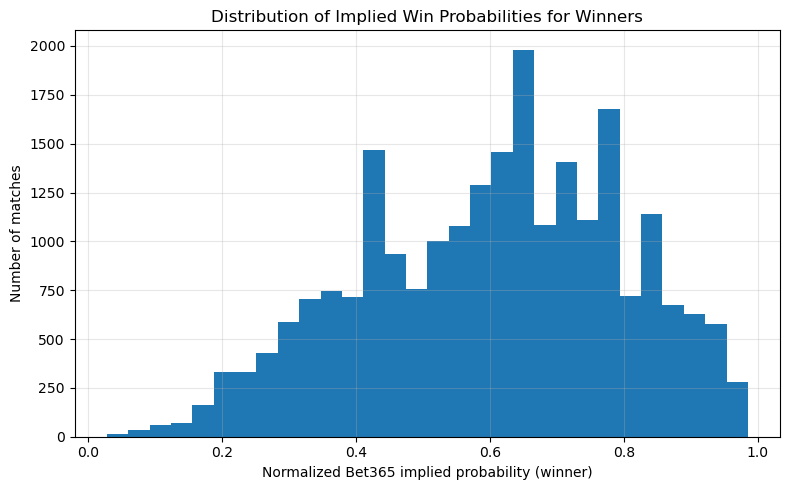

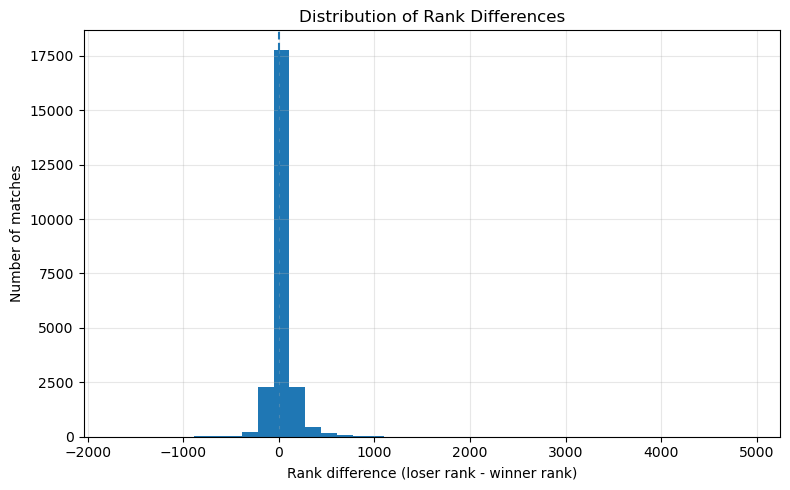

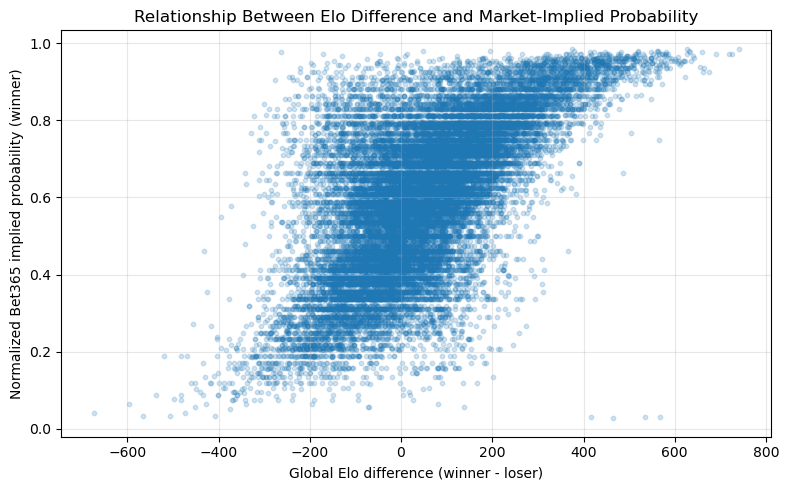

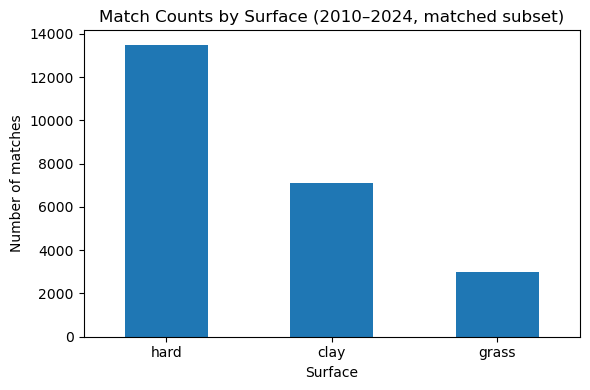

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# If you haven't yet:
# matches = pair_merged.copy()

###########################################
# Plot 1: Histogram of implied win probabilities (Bet365)
###########################################

plt.figure(figsize=(8, 5))
matches["b365w_prob_norm"].dropna().hist(bins=30)
plt.xlabel("Normalized Bet365 implied probability (winner)")
plt.ylabel("Number of matches")
plt.title("Distribution of Implied Win Probabilities for Winners")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###########################################
# Plot 2: Histogram of rank difference (lrank - wrank)
###########################################

plt.figure(figsize=(8, 5))
matches["rank_diff"].dropna().hist(bins=40)
plt.xlabel("Rank difference (loser rank - winner rank)")
plt.ylabel("Number of matches")
plt.title("Distribution of Rank Differences")
plt.axvline(0, linestyle="--")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###########################################
# Plot 3: Elo difference vs implied probability (scatter)
###########################################

plt.figure(figsize=(8, 5))
subset = matches.dropna(subset=["elo_global_diff", "b365w_prob_norm"])

plt.scatter(
    subset["elo_global_diff"],
    subset["b365w_prob_norm"],
    alpha=0.2,
    s=10
)
plt.xlabel("Global Elo difference (winner - loser)")
plt.ylabel("Normalized Bet365 implied probability (winner)")
plt.title("Relationship Between Elo Difference and Market-Implied Probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###########################################
# Plot 4: Match counts by surface
###########################################

plt.figure(figsize=(6, 4))
matches["surface"].value_counts().plot(kind="bar")
plt.xlabel("Surface")
plt.ylabel("Number of matches")
plt.title("Match Counts by Surface (2010–2024, matched subset)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
